In [3]:
import csv
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [7]:
Data1 = pd.read_csv('/home/kuba/Downloads/tf/sign-language-mnist/sign_mnist_train.csv', header = None)
Data2 = pd.read_csv('/home/kuba/Downloads/tf/sign-language-mnist/sign_mnist_test.csv', header = None)
Data1.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
2,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
3,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
4,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163


In [34]:
def get_data(data):
    # You will need to write code that will read the file passed
    # into this function. The first line contains the column headers
    # so you should ignore it
    # Each successive line contians 785 comma separated values between 0 and 255
    # The first value is the label
    # The rest are the pixel values for that picture
    # The function will return 2 np.array types. One with all the labels
    # One with all the images
    #
    # Tips: 
    # If you read a full line (as 'row') then row[0] has the label
    # and row[1:785] has the 784 pixel values
    # Take a look at np.array_split to turn the 784 pixels into 28x28
    # You are reading in strings, but need the values to be floats
    # Check out np.array().astype for a conversion
    
    # Your code starts here
    data = np.array(data)
    labels = np.array(data[1:,0], dtype = int)

    images = np.array(data[1:,1:], dtype = int)
    images = images.reshape(labels.size, 28,28)
    # Your code ends here
    return images, labels


training_images, training_labels = get_data(Data1)
testing_images, testing_labels = get_data(Data2)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [35]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis = 3)
testing_images = np.expand_dims(testing_images, axis = 3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(   rescale = 1.0/255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest'
    )




validation_datagen = ImageDataGenerator( rescale = 1.0/255)


# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [24]:
np.unique(testing_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [40]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
        tf.keras.layers.Conv2D(32, (4,4), input_shape = (28,28,1), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(), 
        tf.keras.layers.Dropout(0.3), 
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dense(25, activation = 'softmax')
    ])

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/15
858/857 [==============================] - 14s 16ms/step - loss: 2.8528 - acc: 0.1345 - val_loss: 1.9123 - val_acc: 0.4151
Epoch 2/15
858/857 [==============================] - 13s 15ms/step - loss: 2.2195 - acc: 0.3027 - val_loss: 1.3674 - val_acc: 0.5484
Epoch 3/15
858/857 [==============================] - 13s 15ms/step - loss: 1.8631 - acc: 0.4047 - val_loss: 1.0519 - val_acc: 0.6684
Epoch 4/15
858/857 [==============================] - 13s 15ms/step - loss: 1.6259 - acc: 0.4758 - val_loss: 0.9822 - val_acc: 0.6577
Epoch 5/15
858/857 [==============================] - 13s 16ms/step - loss: 1.4690 - acc: 0.5265 - val_loss: 0.8409 - val_acc: 0.7073
Epoch 6/15
858/857 [==============================] - 14s 16ms/step - loss: 1.3404 - acc: 0.5646 - val_loss: 0.7499 - val_acc: 0.7366
Epoch 7/15
858/857 [==============================] - 14s 16ms/step - loss: 1.2524 - acc: 0.5894 - val_loss: 0.5643 - val_acc: 0.8116
Epoch 8/15
858/857 [==============================] - 14s 16ms

[6.92426086682151, 0.56609035]

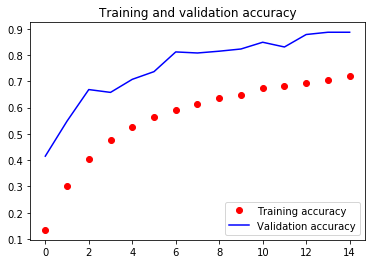

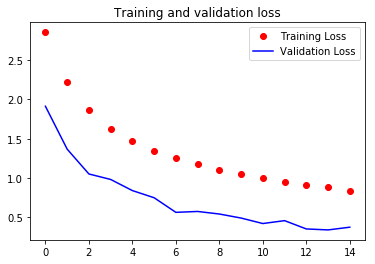

In [46]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()